In [429]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import analysis
import lmpsetup
import hmdsetup
import hmd

import numpy as np
import matplotlib.pyplot as plt
import analysis
import rgRPA

import scipy.constants as cnt

import mdtraj as md
import statsmodels.tsa.stattools
import MDAnalysis.analysis as mda
from matplotlib.lines import Line2D

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [524]:
lmpsetup.LMPSetup('/home/adria/test/pulchra/pr',
                 protein='PR').write_hps_files()

╔═══════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/test/pulchra/pr for PR     ║
║-------------------------------------------------------------------║
║   PARAMETERS                                                      ║
║       - Model = HPS                                               ║
║       - Chains = 1                                                ║
║       - Ionic Strength (mM) = 0.1                                 ║
║       - Medium Permittivity = 80.0                                ║
║       - Temperatures (K) = [300, 320, 340, 360, 380, 400]         ║
║       - HPS Scale = 1.0                                           ║
╚═══════════════════════════════════════════════════════════════════╝


## Summary

**[1. HOOMD Testing](#1)**

**[2. KH Testing](#2)**

**[3. SLAB Testing](#3)**

### 1. HOOMD Testing <a id='1'></a>

In [209]:
temperatures = [300,325,350,375]
for temp in temperatures:
    hmdsetup.HMDSetup(temperature=temp,
                      protein='CPEB4',
                      debye=0.1,
                      oliba_wd='/home/adria/irb/hoomd/csp2/full', 
                      save=5000,
                      t=100000000,
                      slab=False,
                      model='HPS-T').write_hps_files()

In [208]:
temperatures = [300,325,350,375]
lmpsetup.LMPSetup(temperatures=temperatures,
                  protein='CPEB4',
                  debye=0.1,
                  oliba_wd='/home/adria/lmp-ref/full', 
                  save=5000,
                  t=100000000,
                  slab=False,
                  model='HPS-T').write_hps_files()

╔═══════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/lmp-ref/full for CPEB4     ║
║-------------------------------------------------------------------║
║   PARAMETERS                                                      ║
║       - Model = HPS-T                                             ║
║       - Chains = 1                                                ║
║       - Ionic Strength (mM) = 0.1                                 ║
║       - Medium Permittivity = 80.0                                ║
║       - Temperatures (K) = [300, 325, 350, 375]                   ║
║       - HPS Scale = 1.0                                           ║
╚═══════════════════════════════════════════════════════════════════╝


In [194]:
rg_h =[]
temperatures = [300,325,350,375]
for i, temp in enumerate(temperatures):
    tr = md.load(f'/home/adria/irb/hoomd/csp2/full/trajectory_{temp}.dcd', top='/home/adria/irb/hoomd/csp2/full/topo.pdb')
    rg_h.append(md.compute_rg(tr).mean()*100)
rg_h = np.array(rg_h)
rg_l = analysis.Analysis(oliba_wd='/home/adria/lmp-ref/full').rg()

> Taking frames every 2 for a total of 10000 to avoid strong correlations


In [195]:
print(rg_h)
print(rg_l.mean(axis=1))

[17.17280497 15.67061808 15.41776436 16.68127186]
[17.22843141 15.5566841  15.4218347  16.62126677]


**Implementation is finally successful then ! Check some slabs**

[[606.87516154   0.84092491]
 [566.04171223   0.87041971]
 [522.16633199   0.89926338]
 [470.70401813   0.92942422]
 [411.63488876   0.95763001]
 [294.8525757    0.98720765]
 [164.30005766   1.00043906]
 [ 30.55450623   0.98815039]
 [ 12.14386544   0.95806576]
 [  5.89299561   0.92927676]
 [  2.68008032   0.90048446]
 [  2.50114321   0.87103439]
 [  0.80322882   0.84158598]]


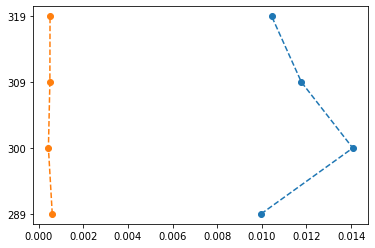

In [526]:
s = hmd.HMD(md_dir='/home/adria/irb/hoomd/FUS')
rho_d, rho_c = s.phase_diagram()
exp_data = np.genfromtxt('/home/adria/documents/fus.txt', delimiter=',')
print(exp_data)
plt.plot(rho_c, s.temperatures, '--o')
plt.plot(rho_d, s.temperatures, '--o')

> Taking frames every 1 for a total of 10000 to avoid strong correlations
> Interface fit failed for negative z, returning 0 (no interface) !!!


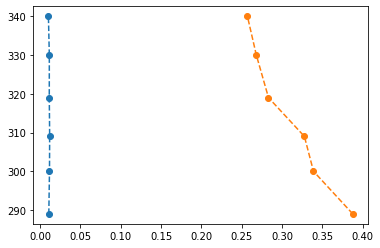

In [528]:
fus = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/FUS_TEST')
rho_c, rho_d = fus.phase_diagram()

exp_data = np.genfromtxt('/home/adria/documents/fus.txt', delimiter=',')
# plt.plot(rho_c*1660.54, fus.temperatures, '--o')
plt.plot(rho_c, fus.temperatures, '--o')
# plt.plot(rho_d*1660.54, fus.temperatures, '--o')
plt.plot(rho_d, fus.temperatures, '--o')
# plt.plot(exp_data[:,0],  exp_data[:,1]*344.4, '--o')

### 2. KH testing <a id='2'></a>

Check if both ways of implementing KH are equal :

In [216]:
temperatures = np.linspace(280,400,4)

# KH as if HPS
lmpsetup.LMPSetup(oliba_wd=f'/home/adria/perdiux/prod/lammps/dignon/KH/hps_kh',
                      host=f'@perdiu35',
                      protein='CPEB4',
                      chains=1, 
                      model='KH-HPS',
                      save=50000,
                      t=int(1e8),
                      processors=2,
                      temperatures=temperatures,
                      debye=0.1).write_hps_files()

╔═══════════════════════════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/perdiux/prod/lammps/dignon/KH/hps_kh for CPEB4     ║
║-------------------------------------------------------------------------------------------║
║   PARAMETERS                                                                              ║
║       - Model = KH-HPS                                                                    ║
║       - Chains = 1                                                                        ║
║       - Ionic Strength (mM) = 0.1                                                         ║
║       - Medium Permittivity = 80.0                                                        ║
║       - Temperatures (K) = [280. 320. 360. 400.]                                          ║
║       - HPS Scale = 1.0                                                                   ║
╚═══════════════════════════════════════════════════════════

In [204]:
temperatures = np.linspace(280,400,4)

# Dignon out of the box
lmpsetup.LMPSetup(oliba_wd=f'/home/adria/perdiux/prod/lammps/dignon/KH/true_kh',
                      host=f'@perdiu35',
                      protein='CPEB4',
                      chains=1, 
                      model='KH',
                      save=50000,
                      t=int(1e8),
                      processors=2,
                      temperatures=temperatures,
                      debye=0.1).write_hps_files()

╔════════════════════════════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/perdiux/prod/lammps/dignon/KH/true_kh for CPEB4     ║
║--------------------------------------------------------------------------------------------║
║   PARAMETERS                                                                               ║
║       - Model = KH                                                                         ║
║       - Chains = 1                                                                         ║
║       - Ionic Strength (mM) = 0.1                                                          ║
║       - Medium Permittivity = 80.0                                                         ║
║       - Temperatures (K) = [280. 320. 360. 400.]                                           ║
║       - HPS Scale = 1.0                                                                    ║
╚═════════════════════════════════════════════════

In [261]:
hps_kh = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/KH/hps_kh')
true_kh = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/KH/true_kh')

> Taking frames every 1 for a total of 10000 to avoid strong correlations
> Taking frames every 1 for a total of 10000 to avoid strong correlations


In [263]:
hps_kh.rg().mean(axis=1)

array([22.21587016, 23.18452454, 24.18940826, 25.45412197])

In [264]:
true_kh.rg().mean(axis=1)

array([22.22314147, 23.18144377, 24.18086114, 25.50792919])

**Good !**

**For asyn :**

In [537]:
# KH as if HPS
r = lmpsetup.LMPSetup(oliba_wd=f'/home/adria/perdiux/prod/lammps/dignon/KH/asyn/hps_kh',
                      host=f'@perdiu34',
                      protein='ASYN',
                      chains=1, 
                      model='KH-HPS',
                      save=50000,
                      t=int(1e8),
                      processors=5,
                      temperatures=[300],
                      debye=0.1)
r.lammps_ordering()
r.del_missing_aas()
r.write_hps_files()

# Dignon out of the box
s = lmpsetup.LMPSetup(oliba_wd=f'/home/adria/perdiux/prod/lammps/dignon/KH/asyn/true_kh',
                      host=f'@perdiu34',
                      protein='ASYN',
                      chains=1, 
                      model='KH',
                      save=50000,
                      t=int(1e8),
                      processors=5,
                      temperatures=[300],
                      debye=0.1)
s.del_missing_aas()
s.lammps_ordering()
s.write_hps_files()

╔═══════════════════════════════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/perdiux/prod/lammps/dignon/KH/asyn/hps_kh for ASYN     ║
║-----------------------------------------------------------------------------------------------║
║   PARAMETERS                                                                                  ║
║       - Model = KH-HPS                                                                        ║
║       - Chains = 1                                                                            ║
║       - Ionic Strength (mM) = 0.1                                                             ║
║       - Medium Permittivity = 80.0                                                            ║
║       - Temperatures (K) = [300]                                                              ║
║       - HPS Scale = 1.0                                                                       ║
╚═══════════════════

In [115]:
temperatures = np.linspace(280,400,4)

# Dignon out of the box
lmpsetup.LMPSetup(oliba_wd=f'/home/adria/perdiux/prod/lammps/dignon/KH/true_kh',
                      host=f'@perdiu35',
                      protein='CPEB4',
                      chains=1, 
                      model='HPS',
                      save=50000,
                      t=int(1e8),
                      processors=2,
                      temperatures=temperatures,
                      debye=0.1).write_hps_files()

╔════════════════════════════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/perdiux/prod/lammps/dignon/KH_test/kh for CPEB4     ║
║--------------------------------------------------------------------------------------------║
║   PARAMETERS                                                                               ║
║       - Model = KH                                                                         ║
║       - Chains = 1                                                                         ║
║       - Ionic Strength (mM) = 0.1                                                          ║
║       - Medium Permittivity = 80.0                                                         ║
║       - Temperatures (K) = [280.         297.14285714 314.28571429 331.42857143 348.57142857
 365.71428571 382.85714286 400.        ]    ║
║       - HPS Scale = 1.0                                                                    ║
╚═══

In [531]:
asyn_hps_kh = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/KH/asyn/hps_kh')
asyn_true_kh = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/KH/asyn/true_kh2')
asyn_dig_kh = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/KH/asyn/dignon')

> Taking frames every 1 for a total of 10000 to avoid strong correlations
> Taking frames every 1 for a total of 10000 to avoid strong correlations
> Taking frames every 1 for a total of 10000 to avoid strong correlations


In [532]:
print(asyn_hps_kh.rg().mean(axis=1), asyn_true_kh.rg().mean(axis=1), asyn_dig_kh.rg().mean(axis=1))

[17.50166791] [17.52189136] [17.43845833]


I assume this is ok, but improve !

In [419]:
helper = analysis.Analysis(oliba_wd=None)

In [420]:
cols = list(helper.residue_dict.keys())
cols.sort()
print(cols)

['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y']


In [421]:
translator = {}
for k in cols:
    aa_3letters = helper.residue_dict[k]["name"]
    translator[aa_3letters] = k

In [422]:
import pandas as pd
df = pd.DataFrame(index=cols, columns=cols)

In [423]:
import os
lambdas = {}
with open('/home/adria/scripts/data/hps/real_kh.dat') as filein:
    for line in filein:
        line = line.split()
        aa_i = translator[line[0]]
        aa_j = translator[line[1]]
        df[aa_i][aa_j] = line[2]
        if aa_i != aa_j:
            df[aa_j][aa_i] = line[2]        

In [425]:
d = df.to_csv(sep=' ')
with open('/home/adria/scripts/data/hps/kh_f.dat', 'w+') as fin:
    fin.write(d)

In [426]:
# KH as if HPS
lmpsetup.LMPSetup(oliba_wd=f'/home/adria/perdiux/prod/lammps/dignon/KH/asyn/hps_kh',
                      host=f'@perdiu34',
                      protein='ASYN',
                      chains=1, 
                      model='KH-HPS',
                      save=50000,
                      t=int(1e8),
                      processors=5,
                      temperatures=[300],
                      debye=0.1).write_hps_files()

╔═════════════════════════════════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/perdiux/prod/lammps/dignon/KH/asyn/true_kh2 for ASYN     ║
║-------------------------------------------------------------------------------------------------║
║   PARAMETERS                                                                                    ║
║       - Model = KH                                                                              ║
║       - Chains = 1                                                                              ║
║       - Ionic Strength (mM) = 0.1                                                               ║
║       - Medium Permittivity = 80.0                                                              ║
║       - Temperatures (K) = [300]                                                                ║
║       - HPS Scale = 1.0                                                                         ║


### 3. Slab testing <a id='3'></a>

In [221]:
fus = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/FUS_TEST')

> Taking frames every 1 for a total of 10000 to avoid strong correlations


> Interface fit failed for negative z, returning 0 (no interface) !!!
605.9212140179975 0.7
> Interface fit failed for negative z, returning 0 (no interface) !!!


KeyboardInterrupt: 

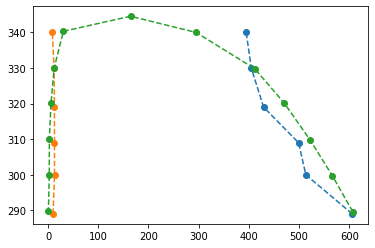

In [479]:
rhos = []
cutoffs = np.linspace(0.7,1,10)
exp_data = np.genfromtxt('/home/adria/documents/fus.txt', delimiter=',')
for cutoff in cutoffs:
    rho_d, rho_c = fus.phase_diagram(cutoff=cutoff)
    d = rho_c[0]/cnt.Avogadro*10**30/10**3
    plt.plot(rho_c*1660.54, fus.temperatures, '--o')
    plt.plot(rho_d*1660.54, fus.temperatures, '--o')
    plt.plot(exp_data[:,0],  exp_data[:,1]*344.4, '--o')
    print(d, cutoff)
    rhos.append(d)

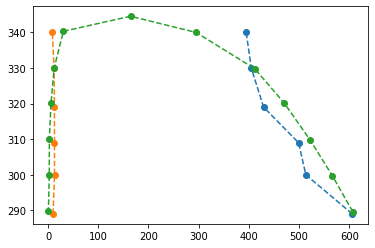

In [480]:
fus = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/FUS_TEST')

exp_data = np.genfromtxt('/home/adria/documents/fus.txt', delimiter=',')
plt.plot(rho_c*1660.54, fus.temperatures, '--o')
plt.plot(rho_d*1660.54, fus.temperatures, '--o')
plt.plot(exp_data[:,0],  exp_data[:,1]*344.4, '--o')

Let's try for FUS, using NPT-Dignon and my NVT:

In [299]:
lmpsetup.LMPSetup(oliba_wd=f'/home/adria/SLAB-TEST/FUS/MINE',
                      protein='FUS',
                      chains=100, 
                      model='HPS',
                      save=500,
                      t=int(10000),
                      slab=True,
                      use_random=True,
                      processors=2,
                      temperatures=[300],
                      debye=0.1).write_hps_files(qsub=False)

╔═══════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/SLAB-TEST/FUS/MINE for FUS     ║
║-----------------------------------------------------------------------║
║   PARAMETERS                                                          ║
║       - Model = HPS                                                   ║
║       - Chains = 100                                                  ║
║       - Ionic Strength (mM) = 0.1                                     ║
║       - Medium Permittivity = 80.0                                    ║
║       - Temperatures (K) = [300]                                      ║
║       - HPS Scale = 1.0                                               ║
╚═══════════════════════════════════════════════════════════════════════╝


-> HMD

In [530]:
# temperatures_FUS = np.array(plot_data)[:,1]*344.4
temperatures_FUS = [290, 300, 310, 320]

for temp in temperatures_FUS:
    hmdsetup.HMDSetup(oliba_wd=f'/home/adria/irb/hoomd/FUS',
                          protein='FUS',
                          chains=100, 
                          model='HPS',
                          save=50000,
                          t=int(1e9),
                          slab=True,
                          use_random=True,
                          temperature=temp,
                          debye=0.1).write_hps_files()